# WEEK 5 SOLUTIONS - POLYGON ANIMATION

### Setting up the notebook for plotting

In [1]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Utility Functions

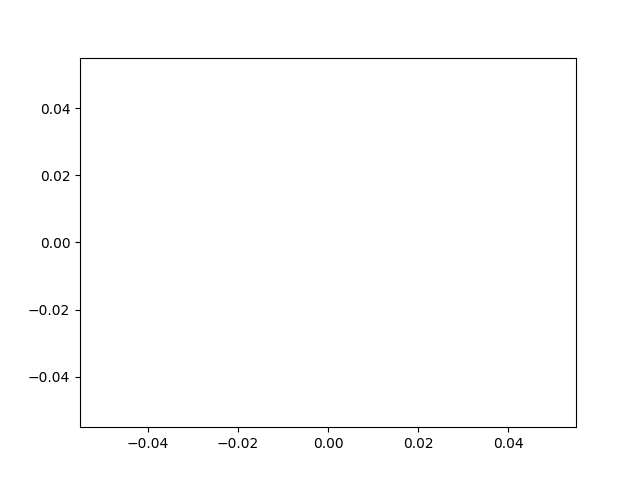

In [2]:
# Creating the plot and axes
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')

t = 840  # LCM of 2,3,4,5,6,7,8


def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,


def update(frame):
    # We update the animation according to the  number of frames passed
    if frame >= 0 / 1000 and frame < 100 / 1000:
        xdata, ydata = morph(sqx, sqy, trix, triy, 10 * frame)
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 100 / 1000 and frame < 200 / 1000:
        xdata, ydata = morph(pentx, penty, sqx, sqy, 10 * (frame - (100 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 200 / 1000 and frame < 300 / 1000:
        xdata, ydata = morph(hexx, hexy, pentx, penty, 10 * (frame - (200 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 300 / 1000 and frame < 400 / 1000:
        xdata, ydata = morph(heptx, hepty, hexx, hexy, 10 * (frame - (300 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 400 / 1000 and frame < 500 / 1000:
        xdata, ydata = morph(octx, octy, heptx, hepty, 10 * (frame - (400 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 500 / 1000 and frame < 600 / 1000:
        xdata, ydata = morph(heptx, hepty, octx, octy, 10 * (frame - (500 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 600 / 1000 and frame < 700 / 1000:
        xdata, ydata = morph(hexx, hexy, heptx, hepty, 10 * (frame - (600 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,

    elif frame > 700 / 1000 and frame < 800 / 1000:
        xdata, ydata = morph(pentx, penty, hexx, hexy, 10 * (frame - (700 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 800 / 1000 and frame < 900 / 1000:
        xdata, ydata = morph(sqx, sqy, pentx, penty, 10 * (frame - (800 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,
    elif frame > 900 / 1000 and frame <= 1000 / 1000:
        xdata, ydata = morph(trix, triy, sqx, sqy, 10 * (frame - (900 / 1000)))
        ln.set_data(xdata, ydata)
        return ln,



### Morphing

In [3]:
#Function that interpolates between the two points of polygons
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1 - alpha) * x2
    ym = alpha * y1 + (1 - alpha) * y2
    return xm, ym

### Polygon Function

In [4]:
# Function that creates a regular polygon and stores the x,y coordinates of its edges
# n is the number of sides
def polygon(n):
    x = []
    y = []
    for i in range(0, n):
        for j in range(0, t // n):
            x.append(np.linspace((np.cos(2 * i * np.pi / n)), np.cos(2 * (i + 1) * np.pi / n), t // n)[j])
            y.append(np.linspace((np.sin(2 * i * np.pi / n)), np.sin(2 * (i + 1) * np.pi / n), t // n)[j])
    x = np.array(x)
    y = np.array(y)
    return x, y
#Calling the edge arrays for each polygon
trix, triy = polygon(3)
sqx, sqy = polygon(4)
pentx, penty = polygon(5)
hexx, hexy = polygon(6)
heptx, hepty = polygon(7)
octx, octy = polygon(8)

### Animation Function

In [7]:
# animation function
ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 1000), init_func=init, blit=True, interval=5, repeat=False)
plt.show()

## Explanation Of The Code:


1. We first establish an interface between the notebook and the animation function in matplotlib.animation using a magic command
2. We import the relevant libraries such as numpy and matplotlib
3. We then create the utility functions requried for plotting the animation such as the axes, range of axes and the subplot
4. We define a Global Variable t = 840. It is the LCM of 2,3,4,5,6,7,8. t is the total number of points in the polygon. Since the        number of points in each side of the polygon must be an integer, t is the LCM of the number of sides of the polygons.
5. We then define the update function. The update fuction generates the xdata and ydata from the morph function. It generates the set    of points required to be plotted. Since we need to transition from shape to shape, I have used if/elif statements to decide which      polygon transition should occur according to the the number of frames that have passed. Care has to be taken to maintain continuity    and to make sure alpha value in the morph function is given carefully(normalize alpha according to frames passed).
6. The update function was constructed such that the shapes transition from triangle to octagon and back.
7. We then define the morph function. It basically links sets of points and gives the transition point in the between the two sets        according to how many frames have elapsed.
8. We then define function "polygon". This function is used to generate a set of points on the edges of each polygon. Note that the      number of points in each sides is 840/n where n is number of sides. Since circumradius of all polygons as given in moodle is 1, the    x and y coordinates of vertices will be cos and sin of multiples of angle 2pi/n.
9. We then call the above function for all the polygons so they can be used in the update function.
10. Finally we use FuncAnimation() to create the animation and plot it.
11. Note that the animation can be sped up and down using the interval parameter in FuncAnimation, it controls the time between each       frame.

### Difference between my animation and the given one

- The animation given in moodle uses a point splitting approach where each point of the polygon, moves towards 2 points of the succeeding polygon. Thus an intermediate polygon of 2n sides will be created. Only one point is fixed in this method, the other move freely according to the morph function.
- In my animation, I have simply interpolated between the 2 polygon edges datasets. In my method, 1 point is fixed and the diametrically opposite one is constrained to move only on the x axis.
- There are no differences in the appearances of the shapes quantitatively and qualitatively, only difference is the approach taken to go from one polygon to the other.